In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/Users/asap/Desktop/data_science/my_portfolio/titanic_survival_classification/train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [10]:
df=df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


<AxesSubplot:>

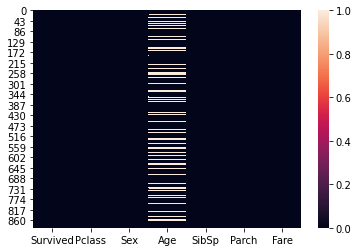

In [66]:
sns.heatmap(df.isnull())

### Survived

In [13]:
y=df['Survived']

In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

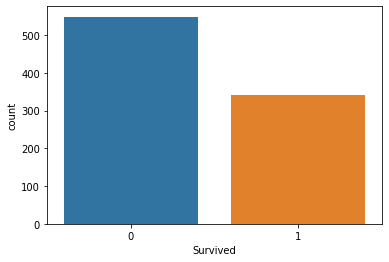

In [15]:
sns.countplot(df['Survived'])

### Pclass

In [16]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

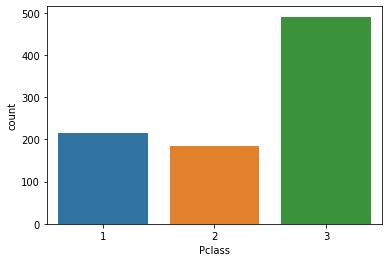

In [17]:
sns.countplot(df['Pclass'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

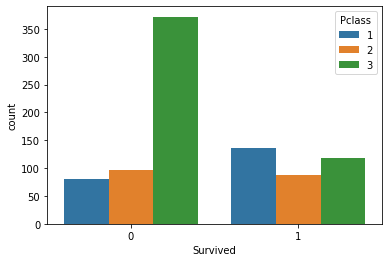

In [19]:
sns.countplot(x='Survived', hue='Pclass', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

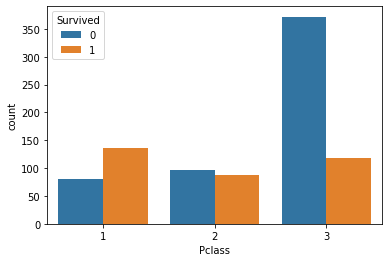

In [20]:
sns.countplot(x='Pclass', hue='Survived', data=df)

We can see that 3rd class passengers had lowest survival rate, while 1st class had highest 

In [54]:
Pclass_dummies=pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)

In [55]:
Pclass_dummies.head()

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


### Sex

In [21]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

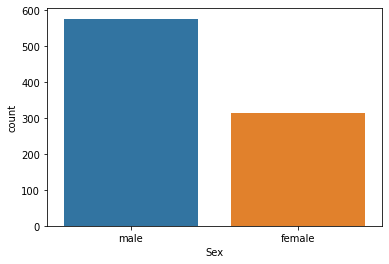

In [22]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

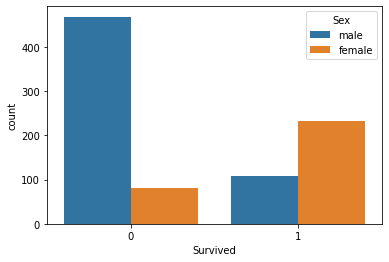

In [23]:
sns.countplot(x='Survived', hue='Sex', data=df)

Here we can see that most of the not survived passengers are male

<AxesSubplot:xlabel='Pclass', ylabel='count'>

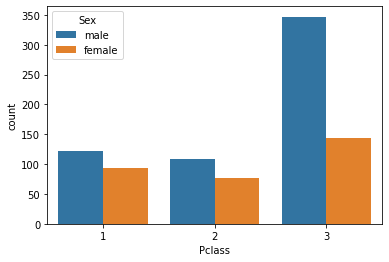

In [24]:
sns.countplot(x='Pclass', hue='Sex', data=df)

This can be partially explained by the facr that 3rd class passengers are mostly male

In [56]:
Sex_dummies=pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)

In [57]:
Sex_dummies.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


### Age

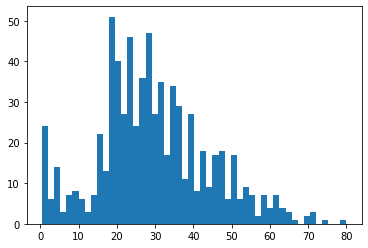

In [27]:
plt.hist(df['Age'], bins=50)
plt.show()

/Users/asap/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/asap/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


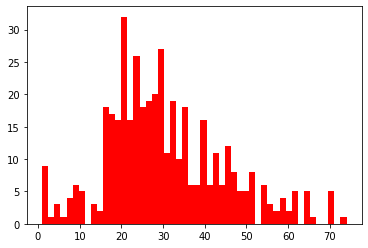

In [30]:
plt.hist(df[df['Survived']==0]['Age'], bins=50, color='red')
plt.show()

/Users/asap/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/asap/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


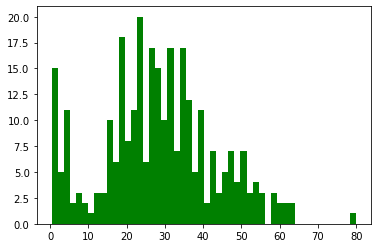

In [31]:
plt.hist(df[df['Survived']==1]['Age'], bins=50, color='green')
plt.show()

/Users/asap/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/asap/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/asap/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/asap/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


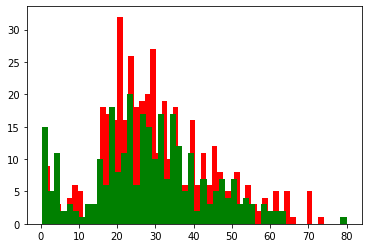

In [47]:
plt.hist(df[df['Survived']==0]['Age'], bins=50, color='red')
plt.hist(df[df['Survived']==1]['Age'], bins=50, color='green')
plt.show()

In [69]:
df[df['Sex']=='male']['Age'].mean()

30.72664459161148

In [70]:
df[df['Sex']=='female']['Age'].mean()

27.915708812260537

In [78]:
age=df['Age'].mean()

In [88]:
age

29.69911764705882

In [89]:
df['Age'].fillna(29.7, inplace=True)

<AxesSubplot:>

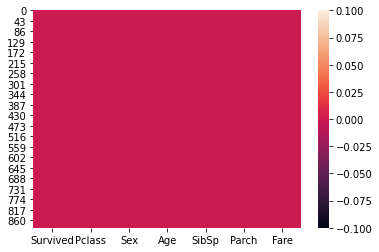

In [90]:
sns.heatmap(df.isnull())

### SibSp

In [32]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

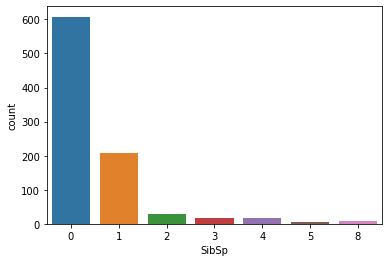

In [33]:
sns.countplot(df['SibSp'])

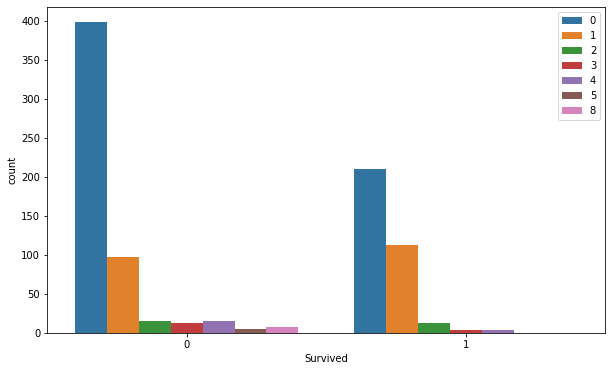

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', hue='SibSp', data=df)
plt.legend(loc='upper right')
plt.show()

### Parch

In [40]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

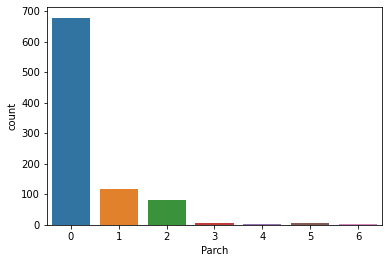

In [41]:
sns.countplot(df['Parch'])

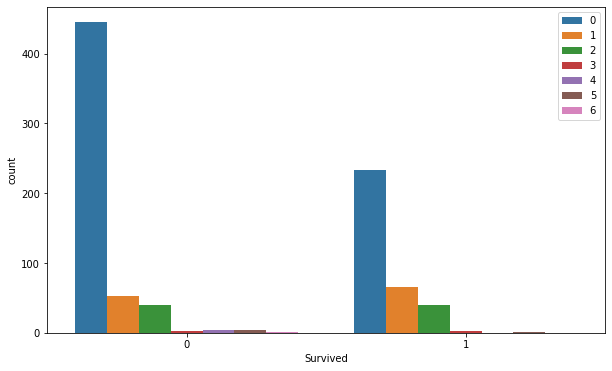

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived', hue='Parch', data=df)
plt.legend(loc='upper right')
plt.show()

### Fare

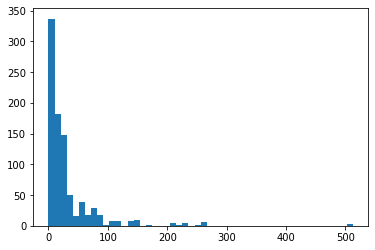

In [43]:
plt.hist(df['Fare'], bins=50)
plt.show()

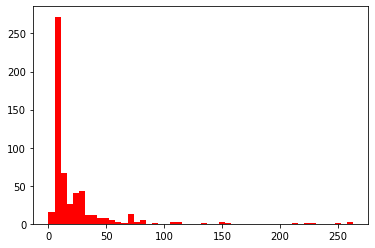

In [44]:
plt.hist(df[df['Survived']==0]['Fare'], bins=50, color='red')
plt.show()

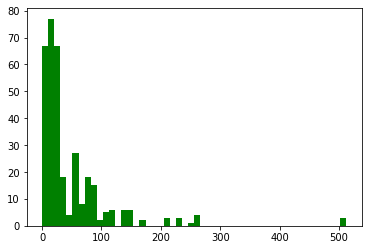

In [45]:
plt.hist(df[df['Survived']==1]['Fare'], bins=50, color='green')
plt.show()

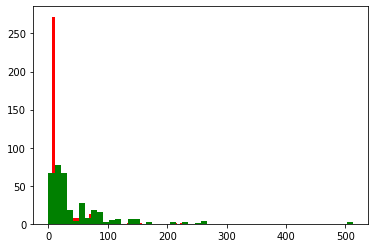

In [46]:
plt.hist(df[df['Survived']==0]['Fare'], bins=50, color='red')
plt.hist(df[df['Survived']==1]['Fare'], bins=50, color='green')
plt.show()

Passengers with cheap fare suffered more 

In [99]:
df_1=pd.concat([df, Pclass_dummies, Sex_dummies], axis=1)
df_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male
0,0,3,male,22.0,1,0,7.2500,0,1,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,1,0
3,1,1,female,35.0,1,0,53.1000,0,0,0
4,0,3,male,35.0,0,0,8.0500,0,1,1


In [100]:
X=df_1.drop(['Survived', 'Pclass', 'Sex'], axis=1)

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Pclass_2  891 non-null    uint8  
 5   Pclass_3  891 non-null    uint8  
 6   Sex_male  891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(3)
memory usage: 30.6 KB


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dtc=DecisionTreeClassifier()

In [106]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
dtc.score(X_train,y_train)

0.9820359281437125

In [108]:
prediction=dtc.predict(X_test)

In [109]:
dtc.score(X_test,y_test)

0.7443946188340808

In [110]:
from sklearn.metrics import confusion_matrix, classification_report

In [111]:
print(confusion_matrix(prediction, y_test))

[[108  31]
 [ 26  58]]


In [112]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       139
           1       0.65      0.69      0.67        84

    accuracy                           0.74       223
   macro avg       0.73      0.73      0.73       223
weighted avg       0.75      0.74      0.75       223



In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

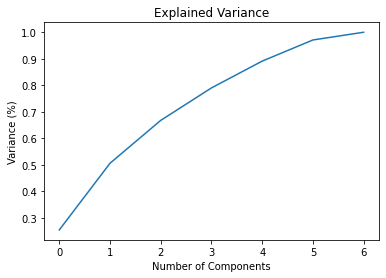

In [116]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

90% of variance is explained by 4 parameters

In [117]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])

In [118]:
principal_x

,PC-1,PC-2,PC-3,PC-4
0,-1.409927,0.390056,-0.160461,0.480182
1,1.347957,-0.021146,0.961680,-0.839337
2,-0.773059,0.303844,-0.054496,-1.690400
3,1.142788,0.020557,0.644112,-0.892412
4,-1.379217,-0.515458,0.397136,0.151705
...,...,...,...,...
886,0.836643,-1.546189,-1.566125,0.723313
887,0.620122,-0.027165,-0.153457,-1.434655
888,0.187694,2.026034,0.076626,-0.900428
889,-0.009857,-0.782748,0.221913,0.395710


In [119]:
X_train, X_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.25, random_state= 42)
dtc_2 = DecisionTreeClassifier()
dtc_2.fit(X_train,y_train)
dtc_2.score(X_test,y_test)

0.7668161434977578

In [120]:
prediction_2=dtc_2.predict(X_test)

In [121]:
print(confusion_matrix(prediction_2, y_test))

[[107  25]
 [ 27  64]]


In [122]:
print(classification_report(prediction_2, y_test))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       132
           1       0.72      0.70      0.71        91

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [123]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [127]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [128]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [129]:
grid_search.best_score_

0.8188979912467735

In [130]:
dtc_3 = DecisionTreeClassifier(criterion = 'entropy', max_depth =30, min_samples_leaf= 2, min_samples_split= 5, splitter ='random')
dtc_3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=5, splitter='random')

In [131]:
dtc_3.score(X_test,y_test)

0.7533632286995515

In [132]:
prediction_3=dtc_3.predict(X_test)

In [133]:
print(confusion_matrix(prediction_3, y_test))

[[107  28]
 [ 27  61]]


In [134]:
print(classification_report(prediction_3, y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       135
           1       0.69      0.69      0.69        88

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223

